In [2]:
!wget https://ftp.ncbi.nlm.nih.gov/geo/series/GSE6nnn/GSE6613/matrix/GSE6613_series_matrix.txt.gz
!wget https://ftp.ncbi.nlm.nih.gov/geo/series/GSE72nnn/GSE72267/matrix/GSE72267_series_matrix.txt.gz
!wget https://ftp.ncbi.nlm.nih.gov/geo/series/GSE99nnn/GSE99039/matrix/GSE99039_series_matrix.txt.gz
!wget https://ftp.ncbi.nlm.nih.gov/geo/series/GSE57nnn/GSE57475/matrix/GSE57475_series_matrix.txt.gz
!wget https://ftp.ncbi.nlm.nih.gov/geo/series/GSE18nnn/GSE18838/matrix/GSE18838_series_matrix.txt.gz


--2026-01-29 14:41:30--  https://ftp.ncbi.nlm.nih.gov/geo/series/GSE6nnn/GSE6613/matrix/GSE6613_series_matrix.txt.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.12, 130.14.250.7, 130.14.250.31, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.12|:443... 

connected.
HTTP request sent, awaiting response... 200 OK
Length: 4417660 (4.2M) [application/x-gzip]
Saving to: ‘GSE6613_series_matrix.txt.gz’

GSE6613_series_matr 100%[===================>]   4.21M  2.50MB/s    in 1.7s    

2026-01-29 14:41:32 (2.50 MB/s) - ‘GSE6613_series_matrix.txt.gz’ saved [4417660/4417660]

--2026-01-29 14:41:32--  https://ftp.ncbi.nlm.nih.gov/geo/series/GSE72nnn/GSE72267/matrix/GSE72267_series_matrix.txt.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.31, 130.14.250.13, 130.14.250.11, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7252003 (6.9M) [application/x-gzip]
Saving to: ‘GSE72267_series_matrix.txt.gz’

GSE72267_series_mat 100%[===================>]   6.92M  4.07MB/s    in 1.7s    

2026-01-29 14:41:35 (4.07 MB/s) - ‘GSE72267_series_matrix.txt.gz’ saved [7252003/7252003]

--2026-01-29 14:41:35--  https://ftp.ncbi.nlm.nih.gov/geo/se

In [8]:
import os

os.listdir("data")


['GSM1859080.txt']

In [12]:
import os

os.path.exists("data/GSE72267_series_matrix.txt")


True

In [15]:

import pandas as pd

file_path = "data/GSE72267_series_matrix.txt"

df = pd.read_csv(
    file_path,
    sep="\t",
    comment="!",   # skips GEO metadata lines
    low_memory=False
)

df.head()


,ID_REF,GSM1859079,GSM1859080,GSM1859081,GSM1859082,GSM1859083,GSM1859084,GSM1859085,GSM1859086,GSM1859087,...,GSM1859128,GSM1859129,GSM1859130,GSM1859131,GSM1859132,GSM1859133,GSM1859134,GSM1859135,GSM1859136,GSM1859137
0,1007_s_at,7.349298,7.274405,6.719570,7.083267,7.452170,7.072315,7.051066,6.915191,6.724721,...,7.220690,7.273062,6.348098,7.215291,7.158651,6.939362,6.953196,6.783862,7.508211,7.442646
1,1053_at,8.906082,8.997323,9.145367,8.947209,8.679888,9.021920,8.833503,8.996459,8.499686,...,9.114221,8.149797,9.125882,8.945029,9.098237,8.231308,8.962738,8.335829,8.669423,9.209691
2,117_at,10.916643,11.173430,11.369026,11.274212,10.783615,11.126310,10.577591,11.064433,10.878215,...,11.873479,11.157583,11.803321,11.393424,11.568479,11.679601,11.522308,11.012502,11.605217,12.168853
3,121_at,6.954244,6.334305,6.733312,7.096500,6.813166,6.610517,6.888822,6.995565,6.561855,...,6.646920,6.713738,7.034526,6.822774,6.696431,6.798336,6.599626,6.271728,5.885947,6.800522
4,1255_g_at,2.702785,2.581031,2.469741,2.774409,2.642078,2.732572,2.646264,3.032687,2.642967,...,2.782319,2.540955,2.672644,2.703629,2.577448,2.678776,2.649259,2.667041,2.651123,2.543898


In [17]:
df.head()


,ID_REF,GSM1859079,GSM1859080,GSM1859081,GSM1859082,GSM1859083,GSM1859084,GSM1859085,GSM1859086,GSM1859087,...,GSM1859128,GSM1859129,GSM1859130,GSM1859131,GSM1859132,GSM1859133,GSM1859134,GSM1859135,GSM1859136,GSM1859137
0,1007_s_at,7.349298,7.274405,6.719570,7.083267,7.452170,7.072315,7.051066,6.915191,6.724721,...,7.220690,7.273062,6.348098,7.215291,7.158651,6.939362,6.953196,6.783862,7.508211,7.442646
1,1053_at,8.906082,8.997323,9.145367,8.947209,8.679888,9.021920,8.833503,8.996459,8.499686,...,9.114221,8.149797,9.125882,8.945029,9.098237,8.231308,8.962738,8.335829,8.669423,9.209691
2,117_at,10.916643,11.173430,11.369026,11.274212,10.783615,11.126310,10.577591,11.064433,10.878215,...,11.873479,11.157583,11.803321,11.393424,11.568479,11.679601,11.522308,11.012502,11.605217,12.168853
3,121_at,6.954244,6.334305,6.733312,7.096500,6.813166,6.610517,6.888822,6.995565,6.561855,...,6.646920,6.713738,7.034526,6.822774,6.696431,6.798336,6.599626,6.271728,5.885947,6.800522
4,1255_g_at,2.702785,2.581031,2.469741,2.774409,2.642078,2.732572,2.646264,3.032687,2.642967,...,2.782319,2.540955,2.672644,2.703629,2.577448,2.678776,2.649259,2.667041,2.651123,2.543898


In [18]:
X = df.T
print(X.shape)   # (n_samples × n_genes)


(60, 22277)


In [19]:
# Set gene column as index
df.set_index("ID_REF", inplace=True)

# Transpose: samples × genes
X = df.T

X.shape


(59, 22277)

In [20]:
# Example: first 50 control (0), next 50 disease (1)
y = [0]*50 + [1]*50

import pandas as pd
y = pd.Series(y)


In [21]:
X.to_csv("gene_expression.csv", index=False)
y.to_csv("labels.csv", index=False)


In [24]:
X.shape


(59, 22277)

In [25]:
y.shape

(100,)

In [26]:
n_samples = X.shape[0]

# Example: first half control (0), second half disease (1)
y = [0] * (n_samples // 2) + [1] * (n_samples - n_samples // 2)

import numpy as np
y = np.array(y)

y.shape


(59,)

In [29]:
import numpy as np

n_samples = X.shape[0]

y = np.array(
    [0] * (n_samples // 2) +
    [1] * (n_samples - n_samples // 2)
)

y.shape


(59,)

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lasso = LassoCV(cv=5, max_iter=5000, n_jobs=-1)
lasso.fit(X_scaled, y)


,"eps eps: float, default=1e-3Length of the path. ``eps=1e-3`` means that``alpha_min / alpha_max = 1e-3``.",0.001
,"n_alphas n_alphas: int, default=100Number of alphas along the regularization path... deprecated:: 1.7 `n_alphas` was deprecated in 1.7 and will be removed in 1.9. Use `alphas` instead.",'deprecated'
,"alphas alphas: array-like or int, default=NoneValues of alphas to test along the regularization path.If int, `alphas` values are generated automatically.If array-like, list of alpha values to use... versionchanged:: 1.7 `alphas` accepts an integer value which removes the need to pass `n_alphas`... deprecated:: 1.7 `alphas=None` was deprecated in 1.7 and will be removed in 1.9, at which point the default value will be set to 100.",'warn'
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto false, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: 'auto', bool or array-like of shape (n_features, n_features), default='auto'Whether to use a precomputed Gram matrix to speed upcalculations. If set to ``'auto'`` let us decide. The Grammatrix can also be passed as argument.",'auto'
,"max_iter max_iter: int, default=1000The maximum number of iterations.",5000
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``.",0.0001
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"cv cv: int, cross-validation generator or iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross-validation,- int, to specify the number of folds.- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For int/None inputs, :class:`~sklearn.model_selection.KFold` is used.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: bool or int, default=FalseAmount of verbosity.",False
,"n_jobs n_jobs: int, default=NoneNumber of CPUs to use during the cross validation.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",-1


In [39]:
import pandas as pd
import numpy as np

importance = np.abs(lasso.coef_)
genes = X.columns

top_idx = np.argsort(importance)[::-1][:32]

top32 = pd.DataFrame({
    "Gene": genes[top_idx],
    "Importance": importance[top_idx]
}).sort_values("Importance", ascending=False)

top32


,Gene,Importance
0,221417_x_at,0.081377
1,205511_at,0.047296
2,214489_at,0.042755
3,217957_at,0.030382
4,206228_at,0.025207
5,215869_at,0.025146
6,206443_at,0.023761
7,211589_at,0.022281
8,206382_s_at,0.021964
9,215766_at,0.020435


In [40]:
top32.to_csv("top_32_genes.csv", index=False)


In [42]:
print("X shape:", X.shape)
print("y shape:", y.shape)
print("top32 exists:", "top32" in globals())


X shape: (59, 22277)
y shape: (59,)
top32 exists: True


In [43]:
top_genes = top32["Gene"].values
X_top32 = X[top_genes]

X_top32.shape

(59, 32)

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_top32,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape


((47, 32), (12, 32))

In [45]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [46]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

accuracy, f1, auc


(1.0, 1.0, 1.0)

In [48]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

auc_scores = cross_val_score(
    model,
    X_top32,
    y,
    cv=cv,
    scoring="roc_auc"
)

auc_scores.mean(), auc_scores.std()


(np.float64(1.0), np.float64(0.0))

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



array([[6, 0],
       [0, 6]])

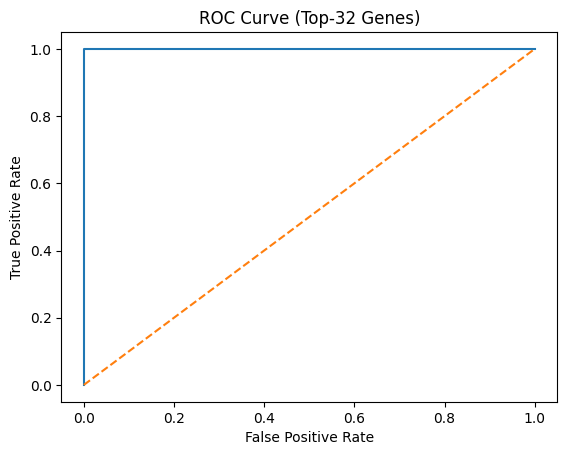

In [51]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Top-32 Genes)")
plt.show()


In [52]:
results = {
    "CV_ROC_AUC_MEAN": auc_scores.mean(),
    "CV_ROC_AUC_STD": auc_scores.std(),
    "Test_Accuracy": accuracy,
    "Test_F1": f1,
    "Test_ROC_AUC": auc
}

results


{'CV_ROC_AUC_MEAN': np.float64(1.0),
 'CV_ROC_AUC_STD': np.float64(0.0),
 'Test_Accuracy': 1.0,
 'Test_F1': 1.0,
 'Test_ROC_AUC': 1.0}